In [1]:
import numpy as np
import matplotlib.pyplot as plt

import OGRePy as gr
# import sympy as sp

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="/Users/adamsmith/opt/anaconda3/envs/gr-env/lib/python3.12/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="/Users/adamsmith/opt/anaconda3/envs/gr-env/lib/python3.12/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///Users/adamsmith/opt/anaconda3/envs/gr-env/lib/python3.12/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

1. The effective potential, analytically and plots it vs r

2. The maxima/minima if the effective potential for both null and timelike cases; then use that to compute these extrema for the Schwarzschild metric

3. The orbits by (in most cases only numerical solutions can be found)

    3a) Finding dphi/dr from Eq. (10) 

    3b) solving it to find r(phi) or phi(r) and plotting it using polar plot method to get the orbits
    
    3c) repeat the above method but now solve (4) and (5) for r(t) and phi(t) and plot them using the method of parametric plot (the common parameter of the two functions is t of course)

# Defining the General Metric

In [2]:
from OGRePy.abc import t, phi, theta

# define a nonnegative r
r = gr.sym("r", nonnegative=True)

# Define the coordinate system
Spherical = gr.Coordinates(t, r, theta, phi)

# Define the metric functions 
f = gr.func("f")(r)
g = gr.func("g")(r)
h = gr.func("h")(r)

# define the metric
metric = gr.Metric(
    coords=Spherical, 
    components=gr.diag(
        -f, 
        g, 
        h, 
        h * gr.s.sin(theta)**2
    )
)

metric.show()

**OGRePy**: You have the latest version of the package.

$$g{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}- f & 0 & 0 & 0\\0 & g & 0 & 0\\0 & 0 & h & 0\\0 & 0 & 0 & h \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [3]:
~metric

$$\begin{align*}
    g{}_{t}{}_{t} &= - f \\
    g{}_{r}{}_{r} &= g \\
    g{}_{\theta}{}_{\theta} &= h \\
    g{}_{\phi}{}_{\phi} &= h \sin^{2}{\left(\theta \right)} 
\end{align*}$$

In [4]:
metric.line_element()

\mathrm{d}\phi**2*h(r)*sin(\theta)**2 + \mathrm{d}\theta**2*h(r) + \mathrm{d}r**2*g(r) - \mathrm{d}t**2*f(r)

# The Effective Potential

In [5]:
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = f * ( sigma - L**2 / h)

Veff

(-L**2/h(r) + \sigma)*f(r)

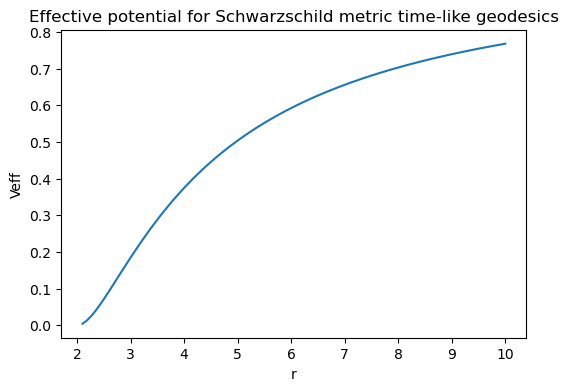

In [6]:
# Plotting the effective potential for the Swartzchild metric 
M = 1
f = 1 - 2*M/r
h = r**2

Veff = f * ( sigma - L**2 / h)

Veff_func = gr.s.lambdify((r, sigma, L), Veff, "numpy") 

# params 
sigma_val = 1 # time-like geodesics
L_val = 2
r_val = np.linspace(2.1, 10, 100)

Veff_vals = Veff_func(r_val, sigma_val, L_val)

plt.figure(figsize=(6, 4))
plt.plot(r_val, Veff_vals)
plt.xlabel("r")
plt.ylabel("Veff")
plt.title("Effective potential for Schwarzschild metric time-like geodesics")
plt.show()


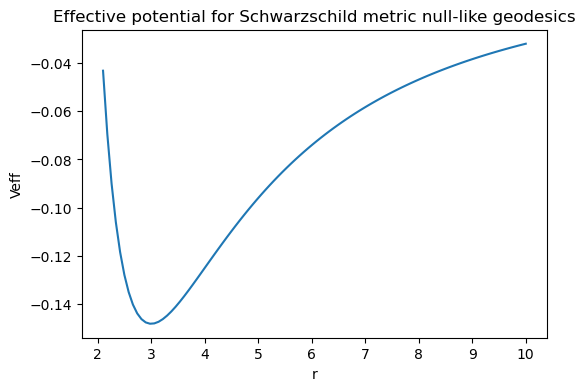

In [7]:
# Plotting the effective potential for the Swartzchild metric 
M = 1
f = 1 - 2*M/r
h = r**2

Veff = f * ( sigma - L**2 / h)

Veff_func = gr.s.lambdify((r, sigma, L), Veff, "numpy") 

# params 
sigma_val = 0 # null-like geodesics
L_val = 2
r_val = np.linspace(2.1, 10, 100)

Veff_vals = Veff_func(r_val, sigma_val, L_val)

plt.figure(figsize=(6, 4))
plt.plot(r_val, Veff_vals)
plt.xlabel("r")
plt.ylabel("Veff")
plt.title("Effective potential for Schwarzschild metric null-like geodesics")
plt.show()

# Extrema for Schwartzchild metric

In [8]:
Veff

(1 - 2/r)*(-L**2/r**2 + \sigma)

In [9]:
# first for null geodesics
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = f * ( sigma - L**2 / h)

dVeff_dr = gr.s.diff(Veff, r).subs(sigma, 0)

print(dVeff_dr.simplify())

extrema = gr.s.solve(dVeff_dr, r)

print('Extrema: ', extrema)

2*L**2*(r - 3)/r**4
Extrema:  [3]


In [10]:
# time-like geodesics
sigma = gr.sym("sigma")
L = gr.sym("L")

Veff = f * ( sigma - L**2 / h)

dVeff_dr = gr.s.diff(Veff, r).subs(sigma, 1)

print(dVeff_dr.simplify())

extrema = gr.s.solve(dVeff_dr, r)

print('Extrema: ', extrema)

2*(L**2*r - 3*L**2 + r**2)/r**4
Extrema:  [L*(-L - sqrt(L**2 + 12))/2, L*(-L + sqrt(L**2 + 12))/2]
